In [1]:
import ROOT
from ROOT import RooFit as RF
import root_numpy as rnp
from root_pandas import read_root

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import itertools

Welcome to JupyROOT 6.14/04


In [31]:
mode = 'psi'
refl_ON = False
get_MC_N_evts = False

### ----------      options are Bs, phi, control
sPlot_from_1 = 'Bs'; sPlot_from_2 = 'phi';  ## for 2D fit
sPlot_cut = 'control'; sPlot_from = 'Bs';   ## for sidebands+sPlot
sPlot_to = 'phi'                        ## common

if sPlot_from != 'Bs': refl_ON = False
sPlot_from_text = mode if sPlot_from == 'control' else sPlot_from
sPlot_to_text = mode if sPlot_to == 'control' else sPlot_to
refl_line = '_refl' if refl_ON else ''
# gStyle.SetTitleFontSize(.085)

left_discr_data =  5.3669 - 0.2; right_discr_data = 5.3669 + 0.2; nbins_discr_data = 40
left_discr_MC =  5.3669 - 0.035; right_discr_MC = 5.3669 + 0.035; nbins_discr_MC = 35

# lrn_phi_data = {'X': [1.0195 - 0.016, 1.0195 + 0.016, 32], 'psi': [1.0195 - 0.016, 1.0195 + 0.016, 32]}
lrn_phi_data = {'X': [1.0195 - 0.030, 1.0195 + 0.030, 30], 'psi': [1.0195 - 0.030, 1.0195 + 0.030, 30]}
left_phi_data, right_phi_data, nbins_phi_data = lrn_phi_data[mode]

# lrn_phi_MC = {'X': [1.0195 - 0.016, 1.0195 + 0.016, 32], 'psi': [1.0195 - 0.0155, 1.0195 + 0.0155, 31]}
lrn_phi_MC = {'X': [1.0195 - 0.016, 1.0195 + 0.016, 32], 'psi': [1.0195 - 0.016, 1.0195 + 0.016, 32]}
left_phi_MC, right_phi_MC, nbins_phi_MC = lrn_phi_MC[mode]

# lrn = left, right, nbins
lrn_control_MC = {'X': [3.872 - 0.025, 3.872 + 0.025, 50], 'psi': [3.686 - 0.025, 3.686 + 0.025, 50]}
# lrn_control_data = {'X': [3.872 - 0.065, 3.872 + 0.065, 65], 'psi': [3.686 - 0.05, 3.686 + 0.05, 50]}
lrn_control_data = {'X': [3.872 - 0.06, 3.872 + 0.06, 30], 'psi': [3.686 - 0.05, 3.686 + 0.05, 50]}

left_control_MC, right_control_MC, nbins_control_MC = lrn_control_MC[mode]
left_control_data, right_control_data, nbins_control_data = lrn_control_data[mode]


In [51]:
variables = ( [

# Intermediate particle's pt and eta
    
#  'mu_1_pt',  'mu_1_eta',
#  'mu_2_pt',  'mu_2_eta',
    
    
#  'K1_pt',  'K1_eta',
#  'K2_pt',  'K2_eta',   

#  'PI1_pt',  'PI1_eta',
#  'PI2_pt',  'PI2_eta',   
  
# #  'JP_pt',   'JP_eta',
#  'X_pt',   'X_eta',
#  'phi_pt', 'phi_eta',
    
#  'BU_pt_Cjp', 'BU_eta_Cjp', 

    
 'BU_pvcos2_Cjp', # 2D cosine of a Bs pointing angle
 'BU_vtxprob_Cjp', # p-value of a vtx kinematic fit under the chi^2 null hypothesis (aka vertex probability)
 'BU_pvdistsignif2_Cjp', # flight distance significance of a Bs meson relative to the primary vertex
    
#  'PV_bestBang_RF_CL', # PV vertex probability
    
 'PIPI_mass_Cjp', 'X_mass_Cjp', 'PHI_mass_Cjp', 'BU_mass_Cjp'  # masses
] ) 

dR_vars = ['dR_mu1', 'dR_mu2', 'dR_pi1', 'dR_pi2', 'dR_K1', 'dR_K2',
           'dR_mu1_vv', 'dR_mu2_vv', 'dR_pi1_vv', 'dR_pi2_vv', 'dR_K1_vv', 'dR_K2_vv']   # delta R variables for MC matching

MC = read_root('BsToPsiPhi_Smatch_v1_pair_dR.root', columns = variables + dR_vars, 
               where = ('PIPI_mass_Cjp > 0.4 && PIPI_mass_Cjp < 0.6' + ' && ' + 
                       'PHI_mass_Cjp > ' + str(left_phi_MC) + ' && PHI_mass_Cjp < ' + str(right_phi_MC) + '&&' +
                       'X_mass_Cjp >' + str(left_control_MC) + ' && X_mass_Cjp < ' + str(right_control_MC) + '&&' +
                       'BU_mass_Cjp > ' + str(left_discr_MC) + ' && BU_mass_Cjp < ' + str(right_discr_MC)))  # psi

MC_baseline = read_root('BsToPsiPhi_Smatch_v1_min_with_pt&eta_8e25fe7.root', columns = variables + dR_vars, 
               where = ('PIPI_mass_Cjp > 0.4 && PIPI_mass_Cjp < 0.6' + ' && ' + 
                       'PHI_mass_Cjp > ' + str(left_phi_MC) + ' && PHI_mass_Cjp < ' + str(right_phi_MC) + '&&' +
                       'X_mass_Cjp >' + str(left_control_MC) + ' && X_mass_Cjp < ' + str(right_control_MC) + '&&' +
                       'BU_mass_Cjp > ' + str(left_discr_MC) + ' && BU_mass_Cjp < ' + str(right_discr_MC)))  # psi
# MC = read_root('BsToPsiPhi_Smatch_v1_min_with_pt&eta_8e25fe7.root', columns = variables + dR_vars) # psi
# data = read_root('new_2_with_more_psi_less.root', columns = variables)

In [52]:
MC.shape, MC_baseline.shape

((84847, 19), (84847, 19))

In [53]:
argmin_K1 = MC[['dR_K1', 'dR_K1_vv']].idxmin(axis=1)
argmin_K2 = MC[['dR_K2', 'dR_K2_vv']].idxmin(axis=1)
argmin_mu1 = MC[['dR_mu1', 'dR_mu1_vv']].idxmin(axis=1)
argmin_mu2 = MC[['dR_mu2', 'dR_mu2_vv']].idxmin(axis=1)
argmin_pi1 = MC[['dR_pi1', 'dR_pi1_vv']].idxmin(axis=1)
argmin_pi2 = MC[['dR_pi2', 'dR_pi2_vv']].idxmin(axis=1)

In [54]:
argmin_K1 = argmin_K1.replace(to_replace='dR_K1_vv', value='dR_K2')
argmin_K2 = argmin_K2.replace(to_replace='dR_K2_vv', value='dR_K1')
argmin_mu1 = argmin_mu1.replace(to_replace='dR_mu1_vv', value='dR_mu2')
argmin_mu2 = argmin_mu2.replace(to_replace='dR_mu2_vv', value='dR_mu1')
argmin_pi1 = argmin_pi1.replace(to_replace='dR_pi1_vv', value='dR_pi2')
argmin_pi2 = argmin_pi2.replace(to_replace='dR_pi2_vv', value='dR_pi1')

In [55]:
argmin_K1[:5]

0    dR_K1
1    dR_K2
2    dR_K2
3    dR_K2
4    dR_K2
dtype: object

In [14]:
argmin_K2[:5]

0       dR_K1
1       dR_K1
2       dR_K1
3    dR_K1_vv
4    dR_K1_vv
dtype: object

In [90]:
bad_bad = (argmin_K1 == argmin_K2) | (argmin_mu1 == argmin_mu2) | (argmin_pi1 == argmin_pi2)
sum(bad_bad)

1011

/home/yaourt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


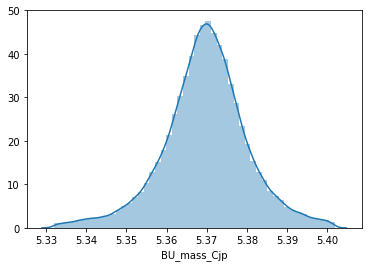

In [99]:
sns.distplot(MC['BU_mass_Cjp'])

/home/yaourt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


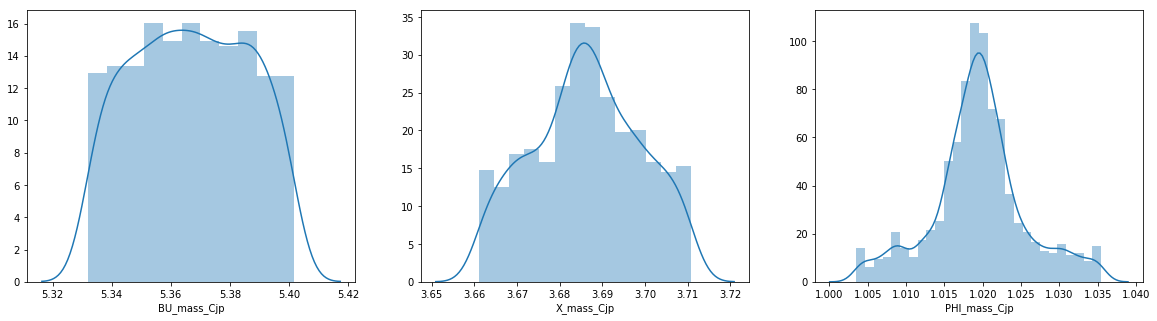

In [83]:
f, axes = plt.subplots(1, 3, figsize=(20, 5))
var_list = ['BU_mass_Cjp', 'X_mass_Cjp', 'PHI_mass_Cjp']
for ax, var in zip(axes, var_list) :
    sns.distplot(MC[bad_bad][var], ax=ax, label=var)
# ax.set_xlim(3.4, 4.3)


In [64]:
matching_mask_baseline = (MC_baseline['dR_mu1'] < 0.01) & (MC_baseline['dR_mu2'] < 0.01) & (MC_baseline['dR_pi1'] < 0.01) & (MC_baseline['dR_pi2'] < 0.01 )& (MC_baseline['dR_K1'] < 0.01) & (MC_baseline['dR_K2'] < 0.01) 

In [65]:
sum(matching_mask_baseline), MC_baseline.shape

(74758, (84847, 19))

In [66]:
sum(bad_bad) / sum(matching_mask_baseline) * 100

1.3523636266352765

/home/yaourt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


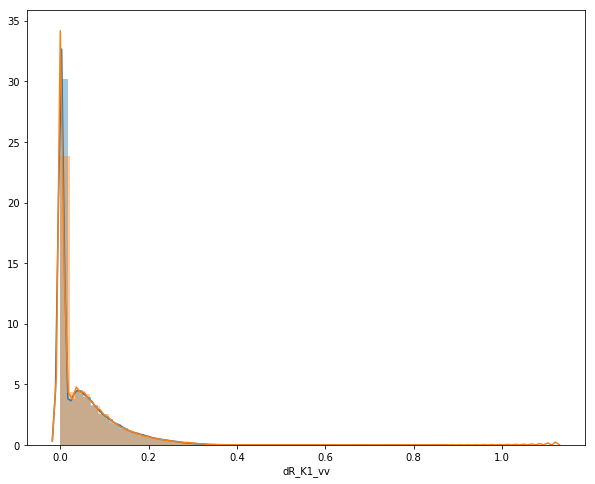

In [89]:
f, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.distplot(MC['dR_K1'], hist=True, kde=True)
sns.distplot(MC['dR_K1_vv'], hist=True, kde=True)

In [98]:
MC.iloc[222]

PHI_mass_Cjp            1.018487
X_mass_Cjp              3.687399
BU_vtxprob_Cjp          0.423459
dR_pi1                  0.098922
BU_pvdistsignif2_Cjp    6.177044
dR_K2                   0.034833
dR_K2_vv                0.043946
dR_mu1                  0.000655
dR_pi2                  0.098193
dR_pi2_vv               0.109716
PIPI_mass_Cjp           0.490285
BU_mass_Cjp             5.346784
dR_mu1_vv               0.136882
dR_mu2                  0.000350
dR_pi1_vv               0.021873
dR_K1_vv                0.000524
dR_mu2_vv               0.137737
dR_K1                   0.030114
BU_pvcos2_Cjp           0.999953
Name: 222, dtype: float64

In [96]:
MC[argmin_K1 == argmin_K2][['dR_K1', 'dR_K1_vv', 'dR_K2', 'dR_K2_vv']]

,dR_K1,dR_K1_vv,dR_K2,dR_K2_vv
153,0.004456,0.177536,0.258177,0.097073
221,0.030114,0.000524,0.034833,0.043946
222,0.030114,0.000524,0.034833,0.043946
608,0.180868,0.184955,0.249670,0.215980
763,0.226834,0.001216,0.121493,0.154806
933,0.055727,0.060528,0.064842,0.001817
954,0.031575,0.000681,0.008753,0.027278
969,0.109885,0.001704,0.136915,0.138884
987,0.166102,0.203265,0.341658,0.003975
1129,0.322794,0.273693,0.386794,0.435468
